In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from minepy import MINE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.datasets import fetch_california_housing
from sklearn.inspection import plot_partial_dependence
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.inspection import permutation_importance

In [2]:
df = pd.read_csv('../../data/tidy/data-aggregation.csv', index_col=[0])

In [138]:
df.head()

,households,med_hh_inc_dol,ms_cara,ms_carp,ms_pt,ms_taxi,ms_bike,ms_walk,ms_wfh,unemp,...,fueloil_gal,vmt,cf_transport_phh,cf_housing_phh,cf_food_phh,cf_goods_phh,cf_services_phh,cf_phh,hh_2014,cf
msa,,,,,,,,,,,,,,,,,,,,,
"Abilene, TX",60343,44249,0.806459,0.117276,0.006420,0.017641,0.002089,0.024034,0.026081,6.4,...,220.478974,192265.733198,15.657754,13.480262,7.577231,4.540864,4.916275,46.172386,100690.0,4.649098e+06
"Aguadilla-Isabela, PR",109620,15681,0.841606,0.083801,0.003571,0.003961,0.001870,0.042219,0.022973,25.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Akron, OH",281752,50776,0.862746,0.066992,0.014979,0.005027,0.001327,0.016849,0.032080,9.7,...,124.833129,115371.753755,15.995618,12.539551,7.604762,5.563126,6.291286,47.994344,227621.0,1.181086e+07
"Albany, GA",58250,36805,0.804208,0.123413,0.010765,0.007939,0.001490,0.019618,0.032567,15.0,...,45.432009,115472.584515,13.906133,14.077966,7.783972,4.548862,4.895082,45.212014,54985.0,2.485983e+06
"Albany, OR",44942,44965,0.773648,0.112044,0.005838,0.011126,0.013241,0.023035,0.061067,11.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
for column in df.columns:
    print(column)

households
med_hh_inc_dol
ms_cara
ms_carp
ms_pt
ms_taxi
ms_bike
ms_walk
ms_wfh
unemp
auto_commuters
annual_excess_fuel_consumed_commuters
ahd
tti
dvmt_freeway
ahd_truck
vmt_arterial
n
m
k_avg
edge_length_total
edge_length_avg
streets_per_node_avg
intersection_count
street_length_total
street_segment_count
street_length_avg
circuity_avg
self_loop_proportion
node_density_km
intersection_density_km
edge_density_km
street_density_km
builing_area_sqkm
area_sqkm
electricity_kwh
nat_gas_cuft
fueloil_gal
vmt
cf_transport_phh
cf_housing_phh
cf_food_phh
cf_goods_phh
cf_services_phh
cf_phh
hh_2014
cf


In [140]:
y = df['cf']

In [141]:
cols_to_plot = df.iloc[:, :-1]

In [204]:
cols_to_plot2 = df.iloc[:, :-3]

In [142]:
list(cols_to_plot)

['households',
 'med_hh_inc_dol',
 'ms_cara',
 'ms_carp',
 'ms_pt',
 'ms_taxi',
 'ms_bike',
 'ms_walk',
 'ms_wfh',
 'unemp',
 'auto_commuters',
 'annual_excess_fuel_consumed_commuters',
 'ahd',
 'tti',
 'dvmt_freeway',
 'ahd_truck',
 'vmt_arterial',
 'n',
 'm',
 'k_avg',
 'edge_length_total',
 'edge_length_avg',
 'streets_per_node_avg',
 'intersection_count',
 'street_length_total',
 'street_segment_count',
 'street_length_avg',
 'circuity_avg',
 'self_loop_proportion',
 'node_density_km',
 'intersection_density_km',
 'edge_density_km',
 'street_density_km',
 'builing_area_sqkm',
 'area_sqkm',
 'electricity_kwh',
 'nat_gas_cuft',
 'fueloil_gal',
 'vmt',
 'cf_transport_phh',
 'cf_housing_phh',
 'cf_food_phh',
 'cf_goods_phh',
 'cf_services_phh',
 'cf_phh',
 'hh_2014']

In [143]:
len(cols_to_plot.columns)

46

In [144]:
#grid = sns.FacetGrid(df, col='cf', col_wrap=3)

C:\Users\acwei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


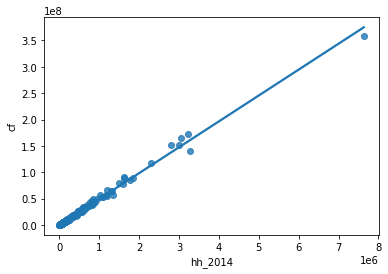

In [145]:
xa = df['hh_2014']
ya = df['cf']
g = sns.regplot(xa, ya, ci=None)

In [198]:
X = df['hh_2014'].values

In [199]:
Y = df['cf'].values

In [192]:
X = sm.add_constant(X, prepend=True)

In [200]:
lm = sm.OLS(Y,X)

In [201]:
result = lm.fit()

In [202]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                          5.315e+04
Date:                Tue, 25 Apr 2023   Prob (F-statistic):                        0.00
Time:                        11:50:53   Log-Likelihood:                         -4819.8
No. Observations:                 297   AIC:                                      9642.
Df Residuals:                     296   BIC:                                      9645.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [156]:
for column in cols_to_plot.columns:
    #grid.map(sns.scatterplot, x, y)
    x = df[column]
    fig = plt.figure(figsize=(8,8))
    plt.scatter(x, y)
    #grid.set_axis_labels(column, 'Total Carbon Footprint (tCO2/yr')
    #grid.set_titles('Total Carbon Footprint vs ' + column)
    plt.xlabel(column)
    plt.ylabel('Total Carbon Footprint (tCO2/yr)')
    plt.title('Total Carbon Footprint vs ' + column)
    plt.savefig('../../figures/' + column + '.png', dpi=300, facecolor='white')
    plt.close(fig)

48.57326549186412

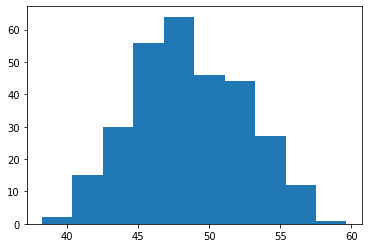

In [159]:
plt.hist(df['cf_phh'])
df['cf_phh'].mean()

(array([265.,  20.,   5.,   3.,   3.,   0.,   0.,   0.,   0.,   1.]),
 array([2.4530000e+03, 7.6542140e+05, 1.5283898e+06, 2.2913582e+06,
        3.0543266e+06, 3.8172950e+06, 4.5802634e+06, 5.3432318e+06,
        6.1062002e+06, 6.8691686e+06, 7.6321370e+06]),
 <BarContainer object of 10 artists>)

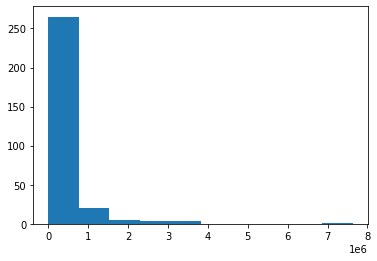

In [123]:
plt.hist(df['hh_2014'])

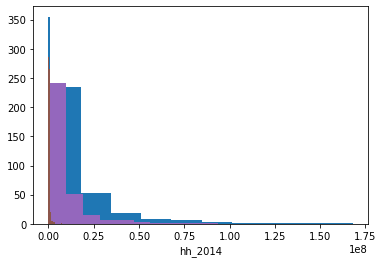

In [119]:
for column in cols_to_plot.columns:
    x = df[column]
    plt.hist(x)
    plt.xlabel(column)
    plt.show

In [254]:
X = cols_to_plot2

In [255]:
X = X.fillna(value=-999)

In [256]:
X.head()

,households,med_hh_inc_dol,ms_cara,ms_carp,ms_pt,ms_taxi,ms_bike,ms_walk,ms_wfh,unemp,...,area_sqkm,electricity_kwh,nat_gas_cuft,fueloil_gal,vmt,cf_transport_phh,cf_housing_phh,cf_food_phh,cf_goods_phh,cf_services_phh
msa,,,,,,,,,,,,,,,,,,,,,
"Abilene, TX",60343,44249,0.806459,0.117276,0.006420,0.017641,0.002089,0.024034,0.026081,6.4,...,7133.829924,92962.405965,277549.286226,220.478974,192265.733198,15.657754,13.480262,7.577231,4.540864,4.916275
"Akron, OH",281752,50776,0.862746,0.066992,0.014979,0.005027,0.001327,0.016849,0.032080,9.7,...,2391.975398,54339.405962,290058.947004,124.833129,115371.753755,15.995618,12.539551,7.604762,5.563126,6.291286
"Albany, GA",58250,36805,0.804208,0.123413,0.010765,0.007939,0.001490,0.019618,0.032567,15.0,...,4172.570196,57568.441526,177636.355916,45.432009,115472.584515,13.906133,14.077966,7.783972,4.548862,4.895082
"Albany-Schenectady-Troy, NY",347401,61841,0.804724,0.076936,0.032160,0.009713,0.002339,0.036837,0.037290,7.4,...,7451.054339,44665.027903,285972.599847,1181.765702,125086.186971,14.217611,10.902159,7.202424,5.309082,6.006795
"Albuquerque, NM",344168,48875,0.799726,0.095175,0.018131,0.013973,0.009816,0.018735,0.044445,9.1,...,24078.610478,49890.513214,147251.735865,4.024810,101942.760602,15.594705,13.531895,7.775563,5.051710,5.576700


In [257]:
rf = RandomForestRegressor(max_features=7, n_estimators=100, random_state=0)

In [258]:
Y = df['cf']/1e+6

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .2, random_state = 1)

In [260]:
y_train

msa
Lubbock, TX                              4.958251
Harrisburg-Carlisle, PA                  5.001775
Riverside-San Bernardino-Ontario, CA    55.297303
Reno, NV                                 6.580491
Champaign-Urbana, IL                     4.851516
                                          ...    
Pittsburgh, PA                          56.532950
Springfield, MO                         84.629552
Duluth, MN-WI                            0.756972
San Angelo, TX                           2.024672
Cape Girardeau, MO-IL                    1.686053
Name: cf, Length: 237, dtype: float64

In [261]:
X_train

,households,med_hh_inc_dol,ms_cara,ms_carp,ms_pt,ms_taxi,ms_bike,ms_walk,ms_wfh,unemp,...,area_sqkm,electricity_kwh,nat_gas_cuft,fueloil_gal,vmt,cf_transport_phh,cf_housing_phh,cf_food_phh,cf_goods_phh,cf_services_phh
msa,,,,,,,,,,,,,,,,,,,,,
"Lubbock, TX",111251,45337,0.817514,0.110346,0.008380,0.008697,0.003989,0.019635,0.031440,6.5,...,6986.364725,34306.656830,1.182813e+05,1.198293,74036.272990,15.229584,14.423832,7.596995,4.573887,4.956072
"Harrisburg-Carlisle, PA",222939,57461,0.814018,0.091457,0.015190,0.007251,0.002665,0.034578,0.034841,6.8,...,4316.871218,9349.499279,3.876728e+04,259.706391,19761.953832,13.872834,13.582635,7.206304,5.152253,5.794723
"Riverside-San Bernardino-Ontario, CA",1297992,55362,0.769210,0.138283,0.015487,0.011266,0.004041,0.016306,0.045407,14.1,...,70950.554246,17065.563887,8.748884e+04,0.562105,48845.628828,16.612679,9.075563,9.445127,5.529772,5.982711
"Reno, NV",166284,53047,0.779961,0.107859,0.021022,0.016283,0.006835,0.025731,0.042308,10.6,...,17638.615675,13734.306644,7.148186e+04,103.456404,47558.240404,16.236463,9.880757,7.661212,5.533739,6.243640
"Champaign-Urbana, IL",91858,48182,0.697954,0.088718,0.058812,0.004905,0.023641,0.074283,0.051687,7.1,...,3725.204063,35543.750230,1.584472e+05,79.392115,76620.622666,15.260347,16.930065,7.157308,4.956470,5.537252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Pittsburgh, PA",989655,51883,0.774544,0.087657,0.053713,0.008940,0.003153,0.034205,0.037788,7.4,...,13834.918619,234288.225888,9.035959e+05,1106.864274,472320.293914,13.774980,16.936339,7.137693,4.935084,5.510848
"Springfield, MO",177468,42880,0.822408,0.098797,0.004350,0.012052,0.004186,0.019888,0.038319,8.0,...,7844.076479,340192.320351,1.031248e+06,596.928391,688453.338291,15.823262,12.951590,7.992573,5.238189,5.795486
"Duluth, MN-WI",117173,47574,0.791354,0.096119,0.018883,0.010975,0.004100,0.040726,0.037843,7.8,...,29123.248708,9717.632589,3.510673e+04,140.692767,25269.263799,17.142989,15.623948,7.566187,5.066073,5.623469


In [262]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_features=7, random_state=0)

In [263]:
y_pred = rf.predict(X_test)

(0.0, 150.0)

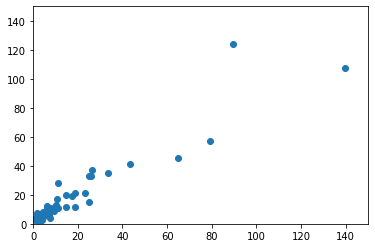

In [264]:
plt.scatter(y_test, y_pred)
plt.ylim(0, 150)
plt.xlim(0, 150)

In [265]:
mean_absolute_percentage_error(y_test, y_pred)

0.693896959354716

In [266]:
result = permutation_importance(
    rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
tree_importances = pd.Series(result.importances_mean, index=X.columns)

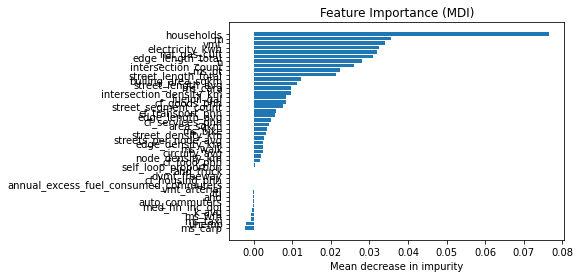

In [267]:
# sort features according to importance
sorted_idx = np.argsort(tree_importances)
pos = np.arange(sorted_idx.shape[0])

# plot feature importances
plt.barh(pos, tree_importances[sorted_idx], align="center")

plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")
plt.xlabel("Mean decrease in impurity");

In [268]:
X.columns

Index(['households', 'med_hh_inc_dol', 'ms_cara', 'ms_carp', 'ms_pt',
       'ms_taxi', 'ms_bike', 'ms_walk', 'ms_wfh', 'unemp', 'auto_commuters',
       'annual_excess_fuel_consumed_commuters', 'ahd', 'tti', 'dvmt_freeway',
       'ahd_truck', 'vmt_arterial', 'n', 'm', 'k_avg', 'edge_length_total',
       'edge_length_avg', 'streets_per_node_avg', 'intersection_count',
       'street_length_total', 'street_segment_count', 'street_length_avg',
       'circuity_avg', 'self_loop_proportion', 'node_density_km',
       'intersection_density_km', 'edge_density_km', 'street_density_km',
       'builing_area_sqkm', 'area_sqkm', 'electricity_kwh', 'nat_gas_cuft',
       'fueloil_gal', 'vmt', 'cf_transport_phh', 'cf_housing_phh',
       'cf_food_phh', 'cf_goods_phh', 'cf_services_phh'],
      dtype='object')

Text(0.5, 1.0, 'Permutation Importance (test set)')

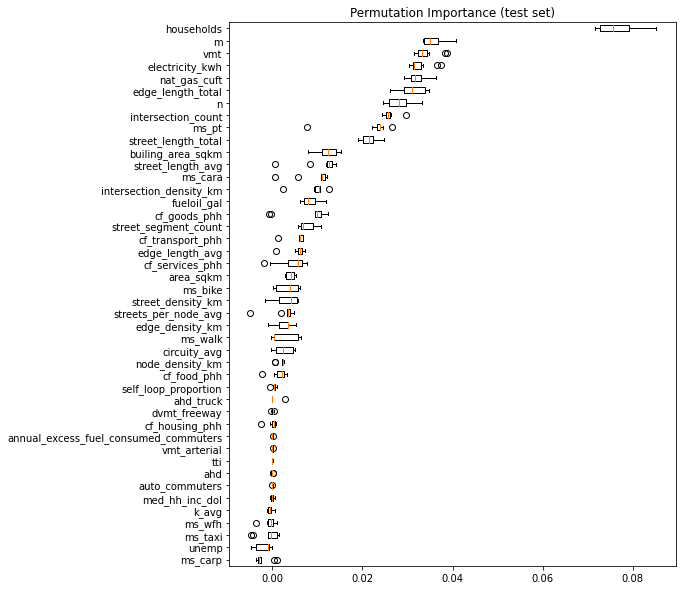

In [271]:
plt.figure(figsize=(8,10))
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X.columns)[sorted_idx],)

plt.title("Permutation Importance (test set)")